## Итоговое задание «Путь аналитика»

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Формируем данные

In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Создаем датафрейм из исходного файла
df = pd.read_excel('/content/drive/MyDrive/Нетология/Задания и Проекты/Основы статистики/Итоговое задание/Исходник _Кондратьев_(FPS-21)_Итог_Зад_Путь_аналитика.xlsx')
df.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
2,1327,6,19.816643,16.200071,Delivery,0
3,2013,2,19.123837,13.731643,Delivery,0
4,2241,6,23.164958,20.436380,Premium,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_gk           2000 non-null   int64  
 1   weekday_key        2000 non-null   int64  
 2   hour_key           2000 non-null   float64
 3   distance_km        2000 non-null   float64
 4   offer_class_group  2000 non-null   object 
 5   driver_response    2000 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 93.9+ KB


In [ ]:
# Для того, чтобы увидеть как пишутся классы поездки, Группирую по классам и за одно вычислим сумму дистанций
df.groupby(['offer_class_group']).agg({'distance_km': ['sum']})
# Уже видим, что сумма у Comfort-класса выше чем у Economy-класса

,distance_km
,sum
offer_class_group,
Comfort,14879.454896
Delivery,8947.410267
Economy,13141.558431
Premium,15583.274698


In [ ]:
# Формирование выборок
df_1 = df[df['offer_class_group'] == 'Comfort'] # Создаем датафрейм с данными по классу Comfort
df_2 = df[df['offer_class_group'] == 'Economy'] # Создаем датафрейм с данными по классу Economy
# Сравниваем датафреймы между собой
print('Выборкки имеют одинаковую длинну: ', len(df_1) == len(df_2)) # Выводим на печать нужный текст с получившимся результатом сравнения


Выборкки имеют одинаковую длинну:  True


# Вычисляем описательные статистики

In [ ]:
# Вычисляем статистики для Comfort-класса
df_1.describe()
# среднее значение больше медианы, распределение положительно искажено

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,465289.002000,4.106000,22.943699,29.758910,0.486000
std,272443.226582,1.968378,4.842951,17.644643,0.500305
min,2710.000000,1.000000,15.496198,0.024259,0.000000
25%,232141.250000,2.000000,19.430402,16.345205,0.000000
50%,475479.000000,4.000000,21.704980,28.078273,0.000000
75%,697329.750000,6.000000,25.120825,41.300650,1.000000
max,918656.000000,7.000000,50.206056,81.507022,1.000000


In [ ]:
# Вычисляем статистики для Economy-класса
df_2.describe()
# среднее значение больше медианы, распределение положительно искажено

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,500.00000,500.000000,500.000000,500.000000,500.000000
mean,463448.91200,3.896000,22.165311,26.283117,0.422000
std,274029.66119,1.989246,4.063839,17.016153,0.494373
min,3845.00000,1.000000,14.899553,0.089947,0.000000
25%,226962.50000,2.000000,19.006174,13.372229,0.000000
50%,455884.50000,4.000000,21.257715,23.798183,0.000000
75%,721415.75000,6.000000,24.402652,36.845287,1.000000
max,919196.00000,7.000000,39.185553,90.516618,1.000000


# Построим графики плотности распределения дистанций поездок для классов Economy и Comfort.

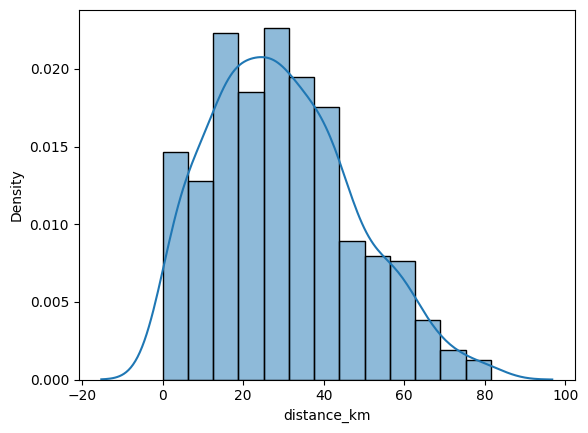

In [ ]:
# Строим гистограмму плотности для Comfort-класса
# С помощью библиотеки seaborn и функции histplot
sns.histplot(df_1['distance_km'], kde=True, stat="density", kde_kws=dict(cut=3)); # kde=True строит кривую плотности # stat="density" - задаем название по оси Х (Плотность)
# Положительном распределение большинство выбросов находится в правой части распределения

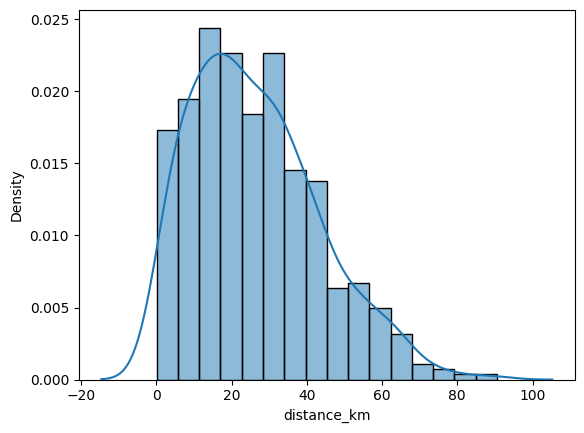

In [ ]:
# Строим гистограмму плотности Economy-класса
sns.histplot(df_2['distance_km'], kde=True, stat="density", kde_kws=dict(cut=3));
# Положительном распределение большинство выбросов находится в правой части распределения

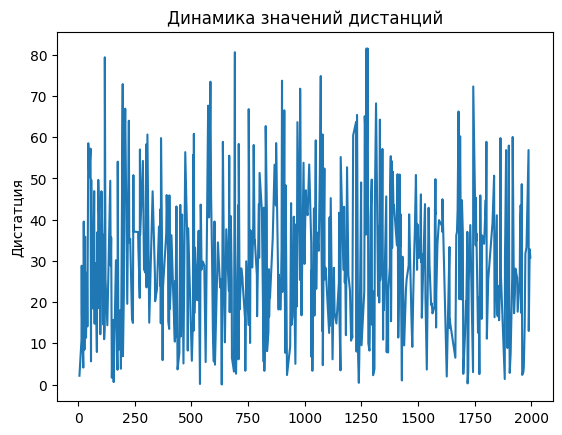

In [ ]:
# График динамики значений Comfort-класса
plt.plot(df_1['distance_km'])
plt.title('Динамика значений дистанций')
plt.ylabel('Дистатция')
plt.show()


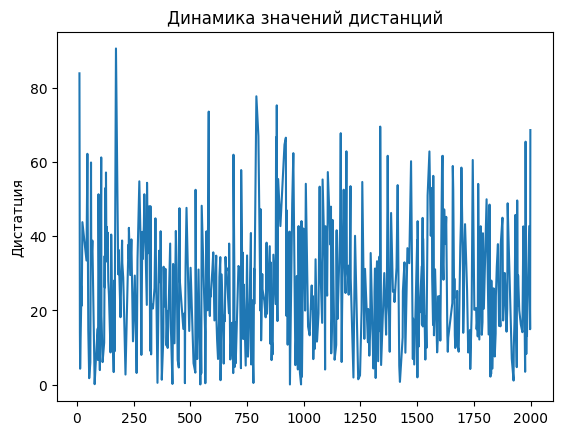

In [ ]:
# График динамики значений Economy-класса
plt.plot(df_2['distance_km'])
plt.title('Динамика значений дистанций')
plt.ylabel('Дистатция')
plt.show()


In [ ]:
# Видим, что количество дальних поездок у Comfort-класса больше чем у Economy-класса

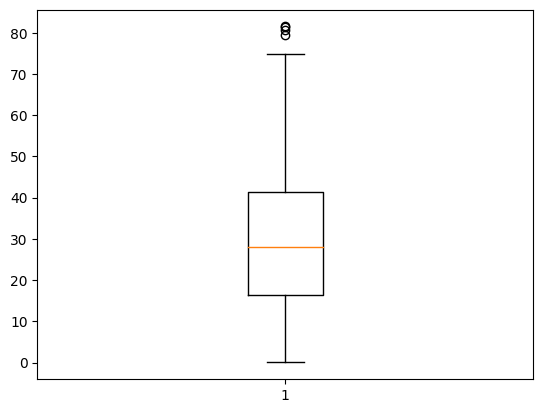

In [ ]:
# Построим boxplot Comfort-класса
plt.boxplot(df_1['distance_km'])
plt.show()

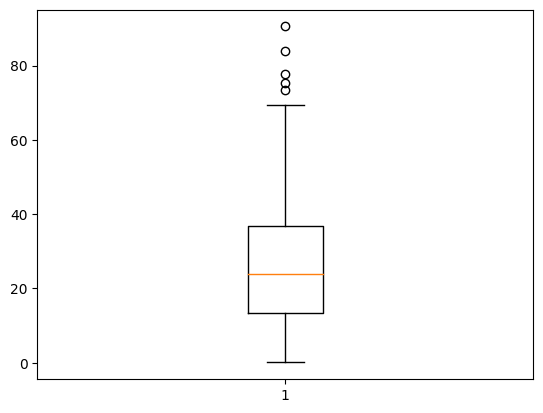

In [ ]:
# Построим boxplot Economy-класса
plt.boxplot(df_2['distance_km'])
plt.show()

In [ ]:
# Видим, что количество дальних поездок находящихся в межквартальном размахе у Comfort-класса больше чем у Economy-класса

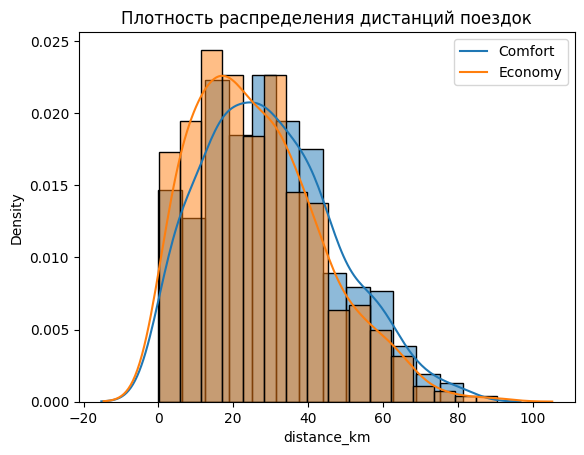

In [ ]:
# Строим гистограмму плотности распределения дистанций поездок Economy-класса и Comfort-класса
sns.histplot(df_1['distance_km'], kde=True, stat="density", kde_kws=dict(cut=3)) # kde_kws=dict(cut=3) задает плотность гистограммы
sns.histplot(df_2['distance_km'], kde=True, stat="density", kde_kws=dict(cut=3))
plt.title('Плотность распределения дистанций поездок') # название
plt.legend(['Comfort', 'Economy']) # Цвет
plt.show()

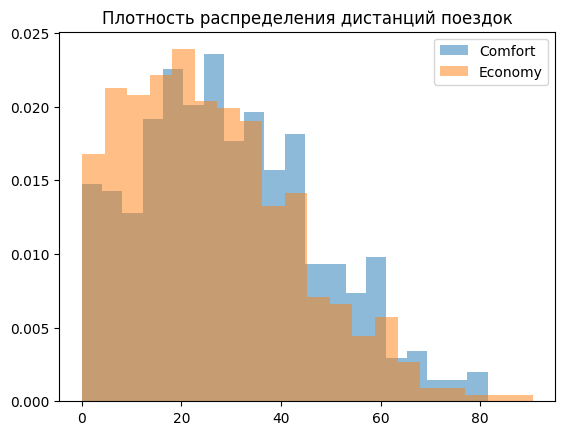

In [ ]:
# Строим гистограмму плотности распределения дистанций поездок Economy-класса и Comfort-класса при помощи функции hist
plt.hist(df_1['distance_km'], alpha=0.5, density=True, bins=20)
plt.hist(df_2['distance_km'], alpha=0.5, density=True, bins=20)
plt.title('Плотность распределения дистанций поездок') # название
plt.legend(['Comfort', 'Economy']) # Цвет легенд
plt.show()

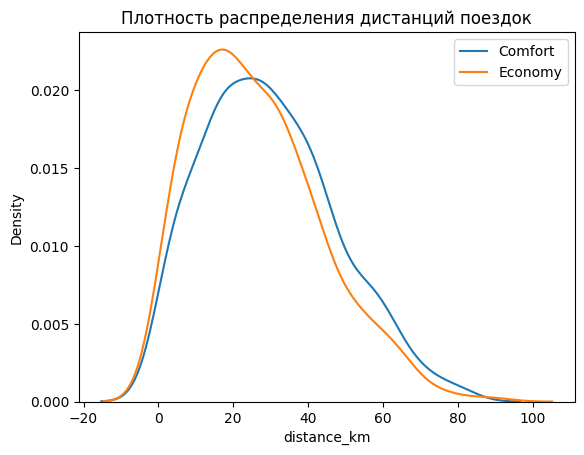

In [ ]:
# Сравним дистанции поездок по кривой плотности (без гистограммы) с помощью функции kdeplot
sns.kdeplot(df_1['distance_km'])
sns.kdeplot(df_2['distance_km'])
plt.title('Плотность распределения дистанций поездок')
plt.legend(['Comfort', 'Economy']);


In [ ]:
# Теперь более наглядно Видим, что количество дальних поездок у Comfort-класса больше чем у Economy-класса

# Проверяем гипотезу: "На дальние поездки пользователи предпочитают Economy-классу более комфортные условия поездки в Comfort-классе"

In [ ]:
# Так, как данные имеют нормальное распределение будем проводить Т-Тест (t-критерий Стьюдента)
from scipy.stats import ttest_ind # библиотека scipy.stats и критерий ttest_ind (t-критерий Стьюдента)
alpha = 0.05  # Уровень значимости
# Нулевая гипотеза        -  Для пользователей нет ни какой разницы на каком классе отправляться в дальнюю поездку, будь то Economy-класс или Comfort-класс.
# Альтернативная гипотеза -  На дальние поездки пользователи предпочитают Economy-классу более комфортные условия поездки в Comfort-классе

In [ ]:
result = ttest_ind(df_1['distance_km'], df_2['distance_km']) # Создаем переменную result, записываем туда результат выполнения функции ttest
print('p-value: %.8f' % result.pvalue) # Вывести результаты p-value с точностью 8-знаков после запятой

if (result.pvalue < alpha): # Сравниваем p-value с 0,05 с выводим результат if-если else-иначе
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00156751
Отвергаем нулевую гипотезу


# Вывод

In [ ]:
# Обе выборки имеют положительное распределение данных большинство выбросов находится в правой части распределения

In [ ]:
# На графике плотности распределения наглядно Видим, что количество дальних поездок у Comfort-класса больше чем у Economy-класса

In [ ]:
# По результатам Т-Теста принята Альтернативная гипотеза: На дальние поездки пользователи предпочитают Economy-классу более комфортные условия поездки в Comfort-классе